![spreedsheet_finance](spreedsheet_finance.jpg)

Your project is centered around developing a reinforcement learning (RL) simulation for stock trading in Python. This initiative is spearheaded by Quantum Trading, a fictional but ambitious trading firm looking to leverage cutting-edge machine learning techniques to gain a competitive edge in the financial markets. Quantum Trading is a small but highly specialised team of financial analysts, data scientists, and software engineers who are passionate about transforming the way trading decisions are made.

In the fast-paced world of financial markets, staying ahead of the curve is crucial. Traditional trading strategies, while effective, often rely on historical data and predefined rules that may not adapt quickly to changing market conditions. Reinforcement learning, a subfield of machine learning where an agent learns to make decisions by interacting with an environment, offers a promising alternative. It allows the trading algorithms to learn and adapt in real-time, improving their performance as they gain more experience.

By engaging with this project, you will gain valuable insights into the dynamic world of algorithmic trading and enhance your skill set in data science, finance, and machine learning. Remember, the journey of learning and experimentation is as important as the results. Good luck, and may your trading algorithms be ever profitable!

## The Data
The provided data `AAPL.csv` contains historical prices for AAPL (the ticker symbol for Apple Inc) and you will be using this in your model. It has been loaded for you already in the sample code below and contains two columns, described below.

| Column | Description |
|--------|-------------|
|`Date`    | The date corresponding to the closing price              |
|`Close`   | The closing price of the security on the given date      |

_**Disclaimer: This project is for educational purposes only. It is not financial advice, and should not be understood or construed as, financial advice.**_

In [23]:
# Make sure to run this cell to use gymnasium gym-anytrading stable-baselines3
!pip install gymnasium gym-anytrading stable-baselines3

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [24]:
# Import required packages
# Note that gym-anytrading is a gym environment specific for trading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gymnasium as gym
import gym_anytrading
from gym_anytrading.envs import Actions
from stable_baselines3 import PPO

# Load the data provided
data = pd.read_csv("AAPL.csv", parse_dates=True, index_col='Date')

# Set window size (lookback window), start and end index of data
window_size = 10
start_index = window_size
end_index = len(data)

# Create the environment using the pre-built 'stocks-v0', passing in the data loaded above
# window_size is how far the environment can look back at each step
# frame_bound is the bounding box of the environment, the size of our data
env = gym.make('stocks-v0', df=data, window_size=window_size, frame_bound=(start_index, end_index))
print("Observation Space:", env.observation_space)

# Initialise cash balance tracking and other variables
balance = 100000
balance_history = [balance]
shares_held = 0
action_stats = {Actions.Sell: 0, Actions.Buy: 0}
observation, info = env.reset(seed=2024)

Observation Space: Box(-10000000000.0, 10000000000.0, (10, 2), float32)


In [25]:
# Start coding here by training the PPO model
model = PPO("MlpPolicy", env, verbose=2)
model.learn(total_timesteps=10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------
| time/              |      |
|    fps             | 2222 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 3.76e+03    |
|    ep_rew_mean          | 149         |
| time/                   |             |
|    fps                  | 631         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.017979436 |
|    clip_fraction        | 0.0641      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.678      |
|    explained_variance   | 0.00132     |
|    learning_rate        | 0.0003      |
|    loss               

In [26]:
done = False
step = 0

while not done:
    action, _states = model.predict(observation)
    current_price = env.unwrapped.prices[env.unwrapped._current_tick]
    observation, rewards, terminated, truncated, info = env.step(action)
    trade_amount = balance * 0.1
    
    if action == Actions.Buy.value:
        shares_to_buy = balance / current_price
        shares_held += shares_to_buy
        balance -= trade_amount
        print(f"{step}: BUY {shares_to_buy:.2f} shares at ${current_price:.2f} | Balance: ${balance:.2f}")
    elif action == Actions.Sell.value and shares_held > 0:
        balance += shares_held * current_price
        shares_held = 0
        print(f"{step}: SELL {shares_to_buy:.2f} shares at ${current_price:.2f} | Balance: ${balance:.2f}")
    else:
        print(f"{step}: HOLD Current price: ${current_price:.2f} | Balance: ${balance:.2f}")
        
    action_stats[Actions(action)] += 1
    balance_history.append(balance)
    step += 1
    if terminated or truncated:
        break

# If we still hold shares at the end, sell them all
if shares_held > 0:
    balance += shares_held * current_price
    print(f"\nFinal SELL {shares_held:.2f} shares at ${current_price:.2f} | Balance: ${balance:.2f}")
    shares_held = 0

env.close()

0: BUY 1344.27 shares at $74.39 | Balance: $90000.00
1: BUY 1197.49 shares at $75.16 | Balance: $81000.00
2: BUY 1066.70 shares at $75.93 | Balance: $72900.00
3: BUY 940.25 shares at $77.53 | Balance: $65610.00
4: BUY 833.12 shares at $78.75 | Balance: $59049.00
5: SELL 833.12 shares at $77.85 | Balance: $478037.23
6: BUY 6215.34 shares at $76.91 | Balance: $430233.50
7: SELL 6215.34 shares at $77.39 | Balance: $911207.50
8: BUY 11845.02 shares at $76.93 | Balance: $820086.75
9: BUY 10415.12 shares at $78.74 | Balance: $738078.08
10: BUY 9428.09 shares at $78.29 | Balance: $664270.27
11: BUY 8323.41 shares at $79.81 | Balance: $597843.24
12: BUY 7547.33 shares at $79.21 | Balance: $538058.92
13: SELL 7547.33 shares at $79.72 | Balance: $4329579.11
14: HOLD Current price: $79.18 | Balance: $4329579.11
15: BUY 54441.29 shares at $79.53 | Balance: $3896621.20
16: BUY 48975.60 shares at $79.56 | Balance: $3506959.08
17: SELL 48975.60 shares at $79.49 | Balance: $11727050.30
18: BUY 145745.

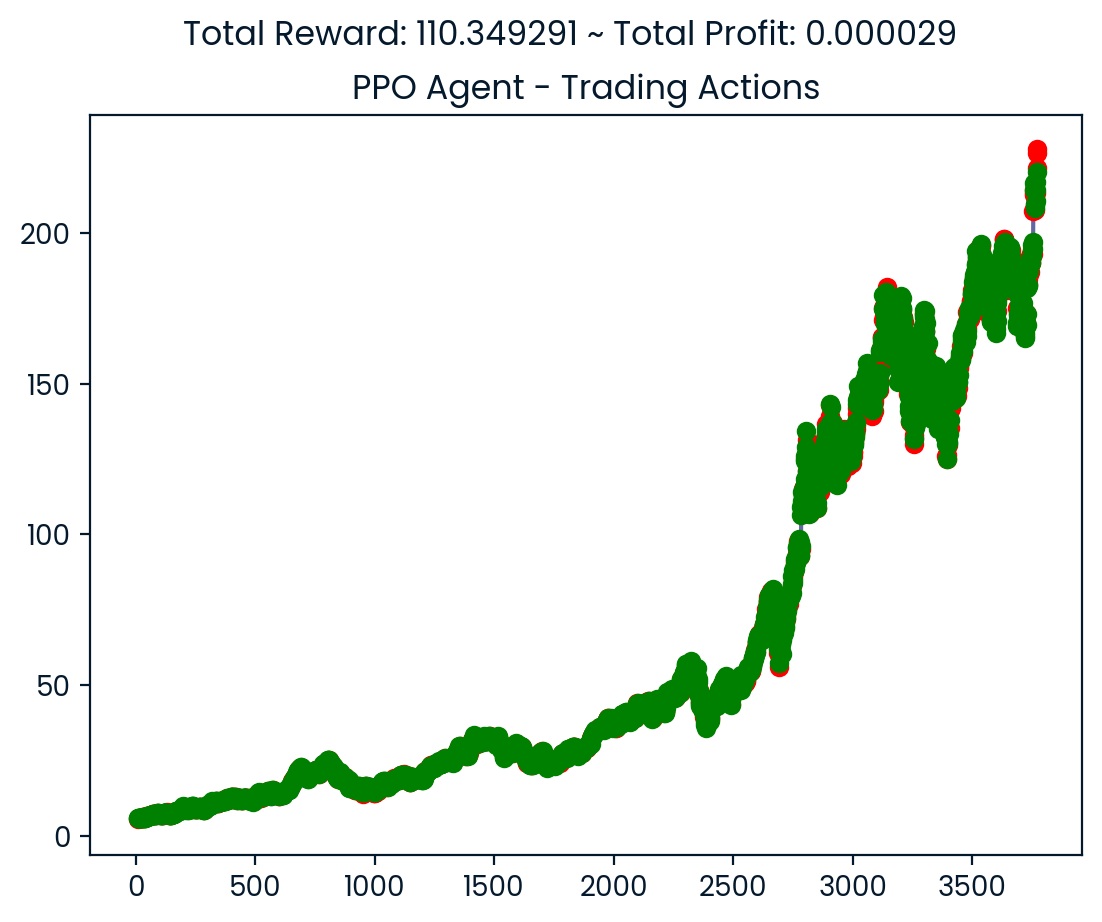

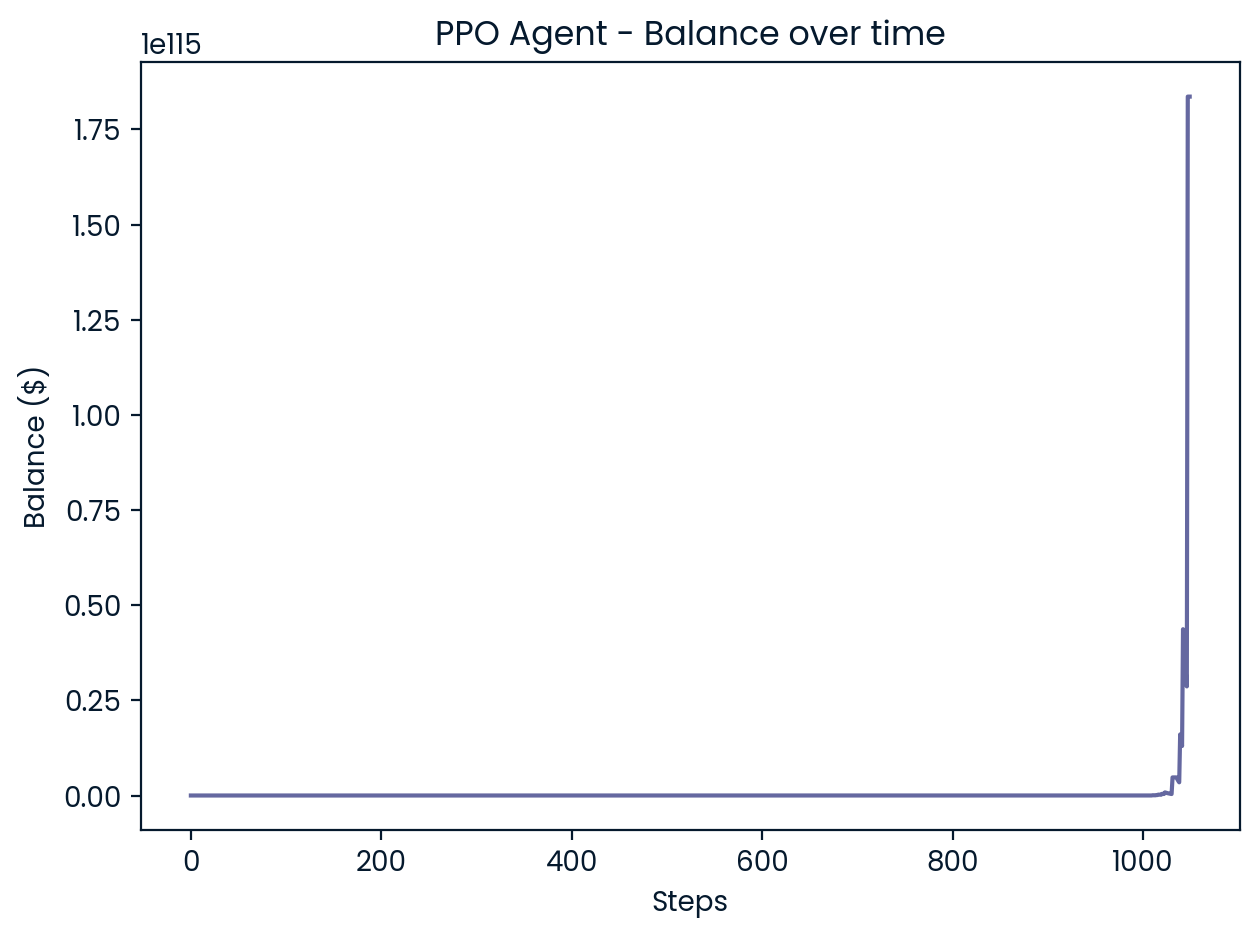

In [27]:
# Create your two charts below. Note, do not change the fig and ax variable names.

# Chart 1, a plot showing trading actions
fig, ax = plt.subplots()
env.unwrapped.render_all()
ax.set_title('PPO Agent - Trading Actions')
plt.show()

# Chart 2, a plot of the balance_history over time
fig2, ax2 = plt.subplots()
ax2.plot(balance_history)
ax2.set_title('PPO Agent - Balance over time')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Balance ($)')

fig2.tight_layout()
plt.show()